In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('bankruptcy-prevention (1).csv',sep=';')

In [ ]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [ ]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
print(df.describe())

       industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000          0.500000        

In [ ]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [ ]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Now, if you check for duplicates again, you should get all False values
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
185    False
187    False
190    False
192    False
194    False
Length: 103, dtype: bool


In [ ]:
df[df.duplicated()].shape

(0, 7)

In [ ]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [ ]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000


In [ ]:
# Count of bankruptcy and non-bankruptcy case
df[' class'].value_counts()

non-bankruptcy    78
bankruptcy        25
Name:  class, dtype: int64

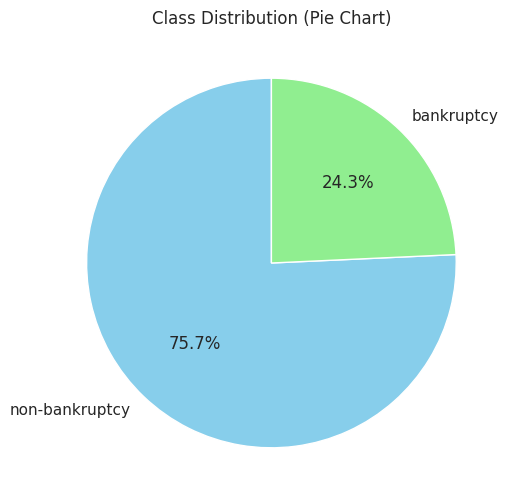

In [ ]:
# Pie chart for class distribution
class_counts = df[' class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Class Distribution (Pie Chart)')
plt.show()

<Axes: xlabel='industrial_risk'>

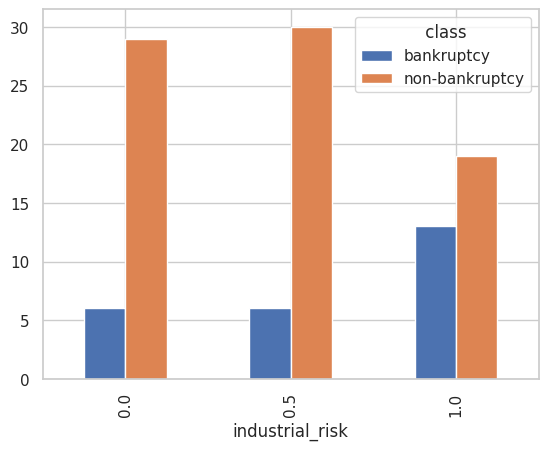

In [ ]:
pd.crosstab(df['industrial_risk'], df[' class']).plot(kind = 'bar')

<Axes: xlabel=' management_risk'>

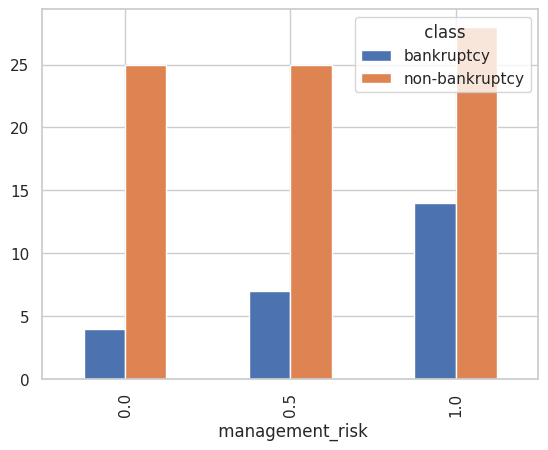

In [ ]:
pd.crosstab(df[' management_risk'], df[' class']).plot(kind = 'bar')

<Axes: xlabel=' financial_flexibility'>

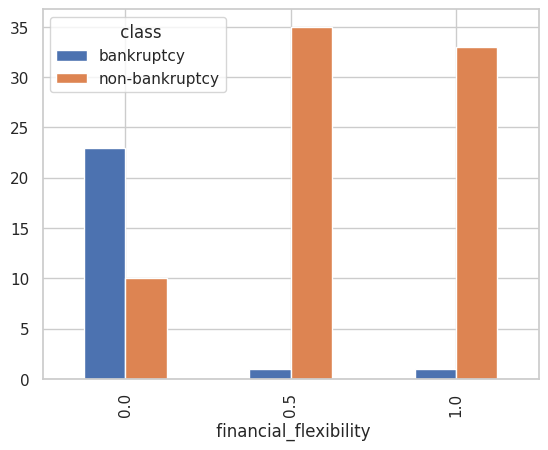

In [ ]:
pd.crosstab(df[' financial_flexibility'], df[' class']).plot(kind = 'bar')

<Axes: xlabel=' credibility'>

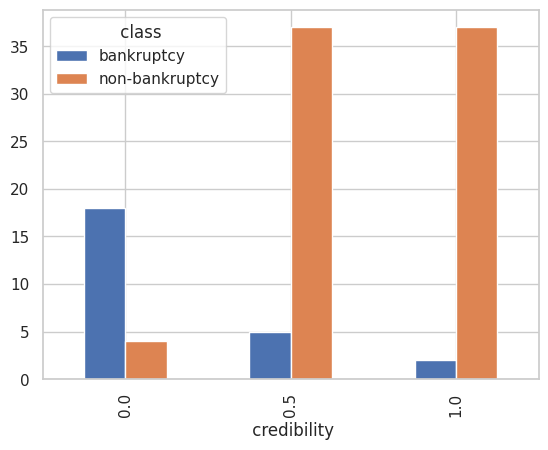

In [ ]:
pd.crosstab(df[' credibility'], df[' class']).plot(kind = 'bar')

<Axes: xlabel=' competitiveness'>

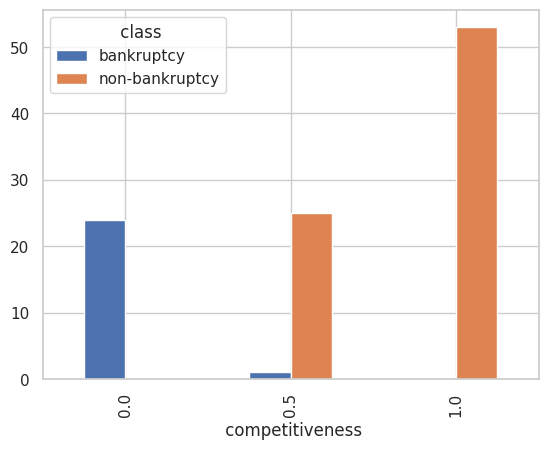

In [ ]:
pd.crosstab(df[' competitiveness'], df[' class']).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

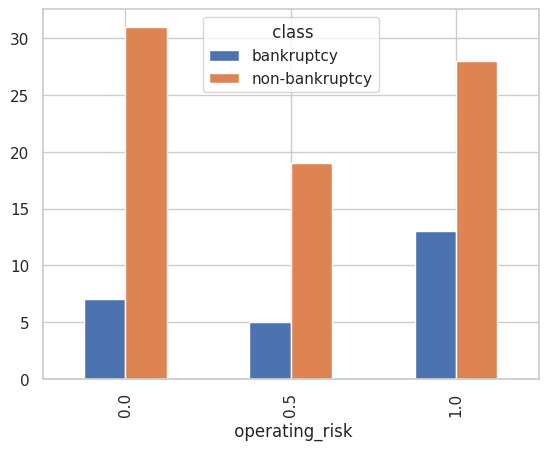

In [ ]:
pd.crosstab(df[' operating_risk'], df[' class']).plot(kind = 'bar')

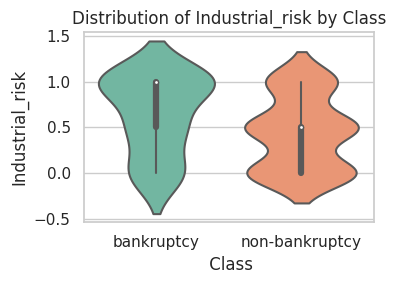

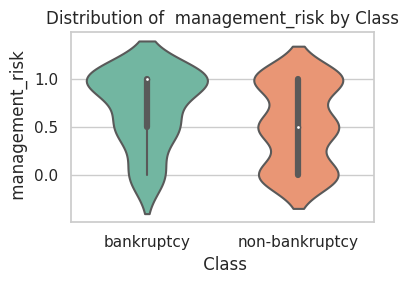

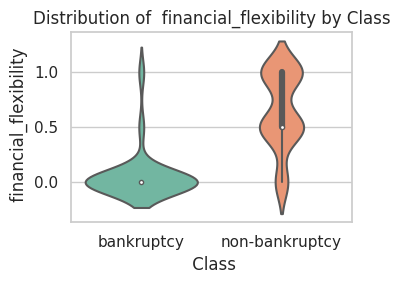

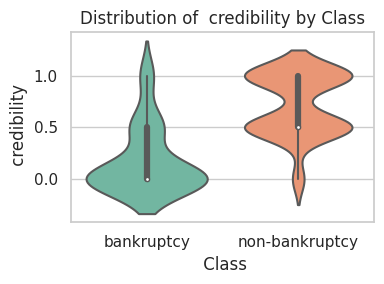

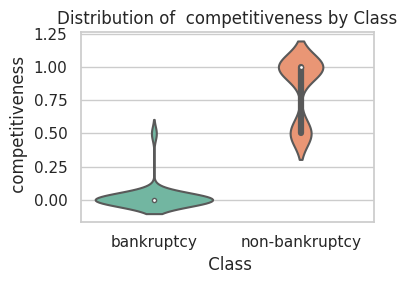

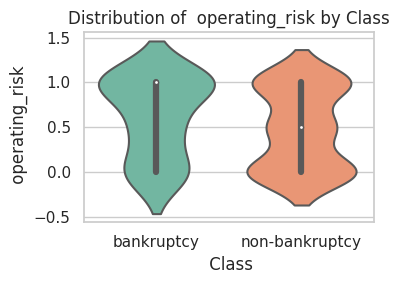

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Loop through each feature and create a separate violin plot
for column in df.columns[:-1]:  # excluding the 'class' column
    plt.figure(figsize=(4, 3))
    sns.violinplot(x=' class', y=column, data=df, palette='Set2')
    plt.title(f'Distribution of {column.capitalize()} by Class')
    plt.xlabel(' Class')
    plt.ylabel(column.capitalize())
    plt.tight_layout()
    plt.show()


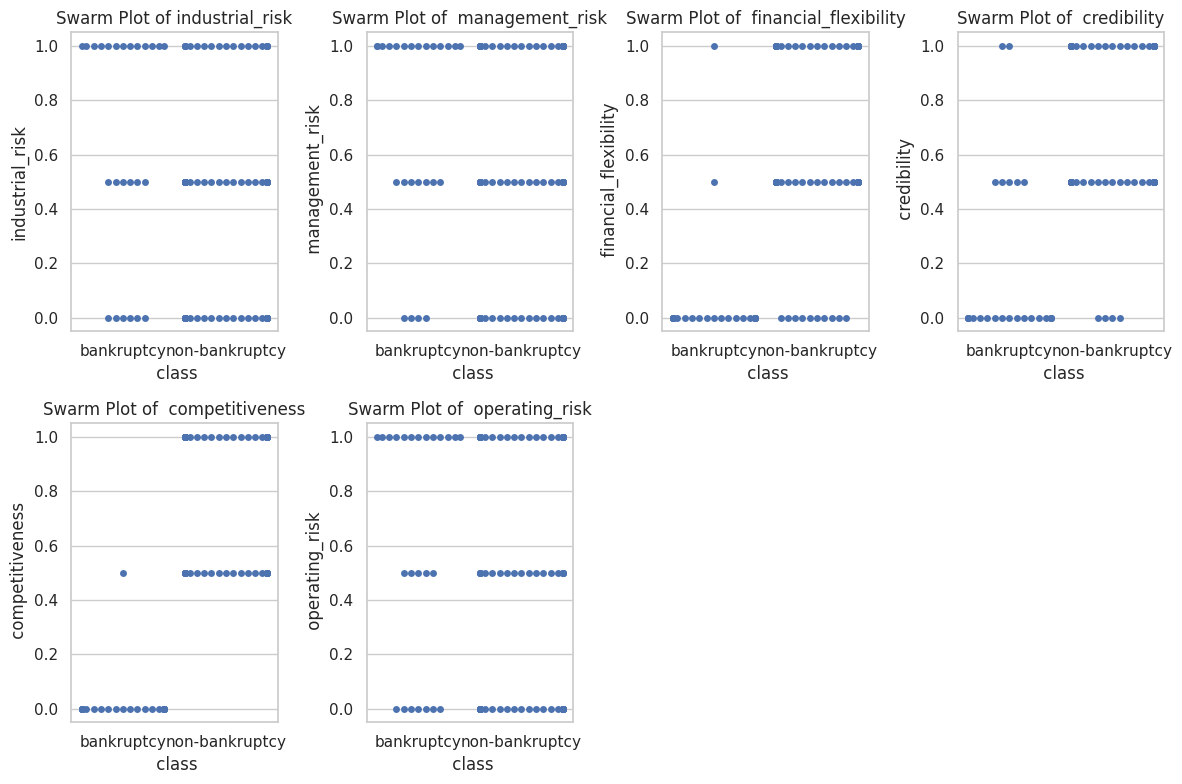

In [ ]:
# Swarm plot for each feature by class
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.swarmplot(x=' class', y=column, data=df)
    plt.title(f'Swarm Plot of {column}')
plt.tight_layout()
plt.show()

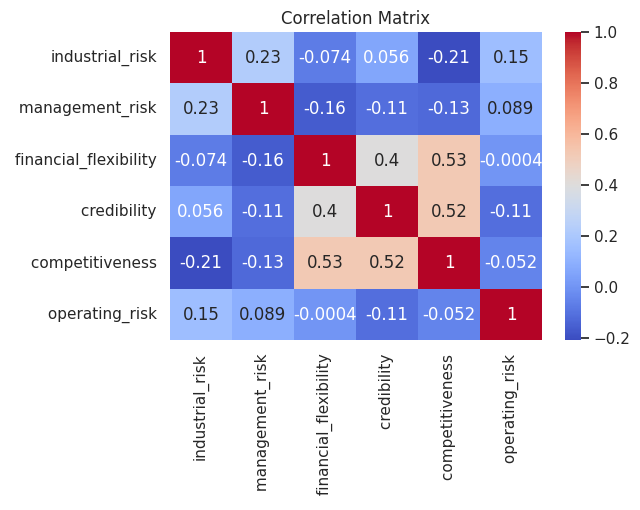

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


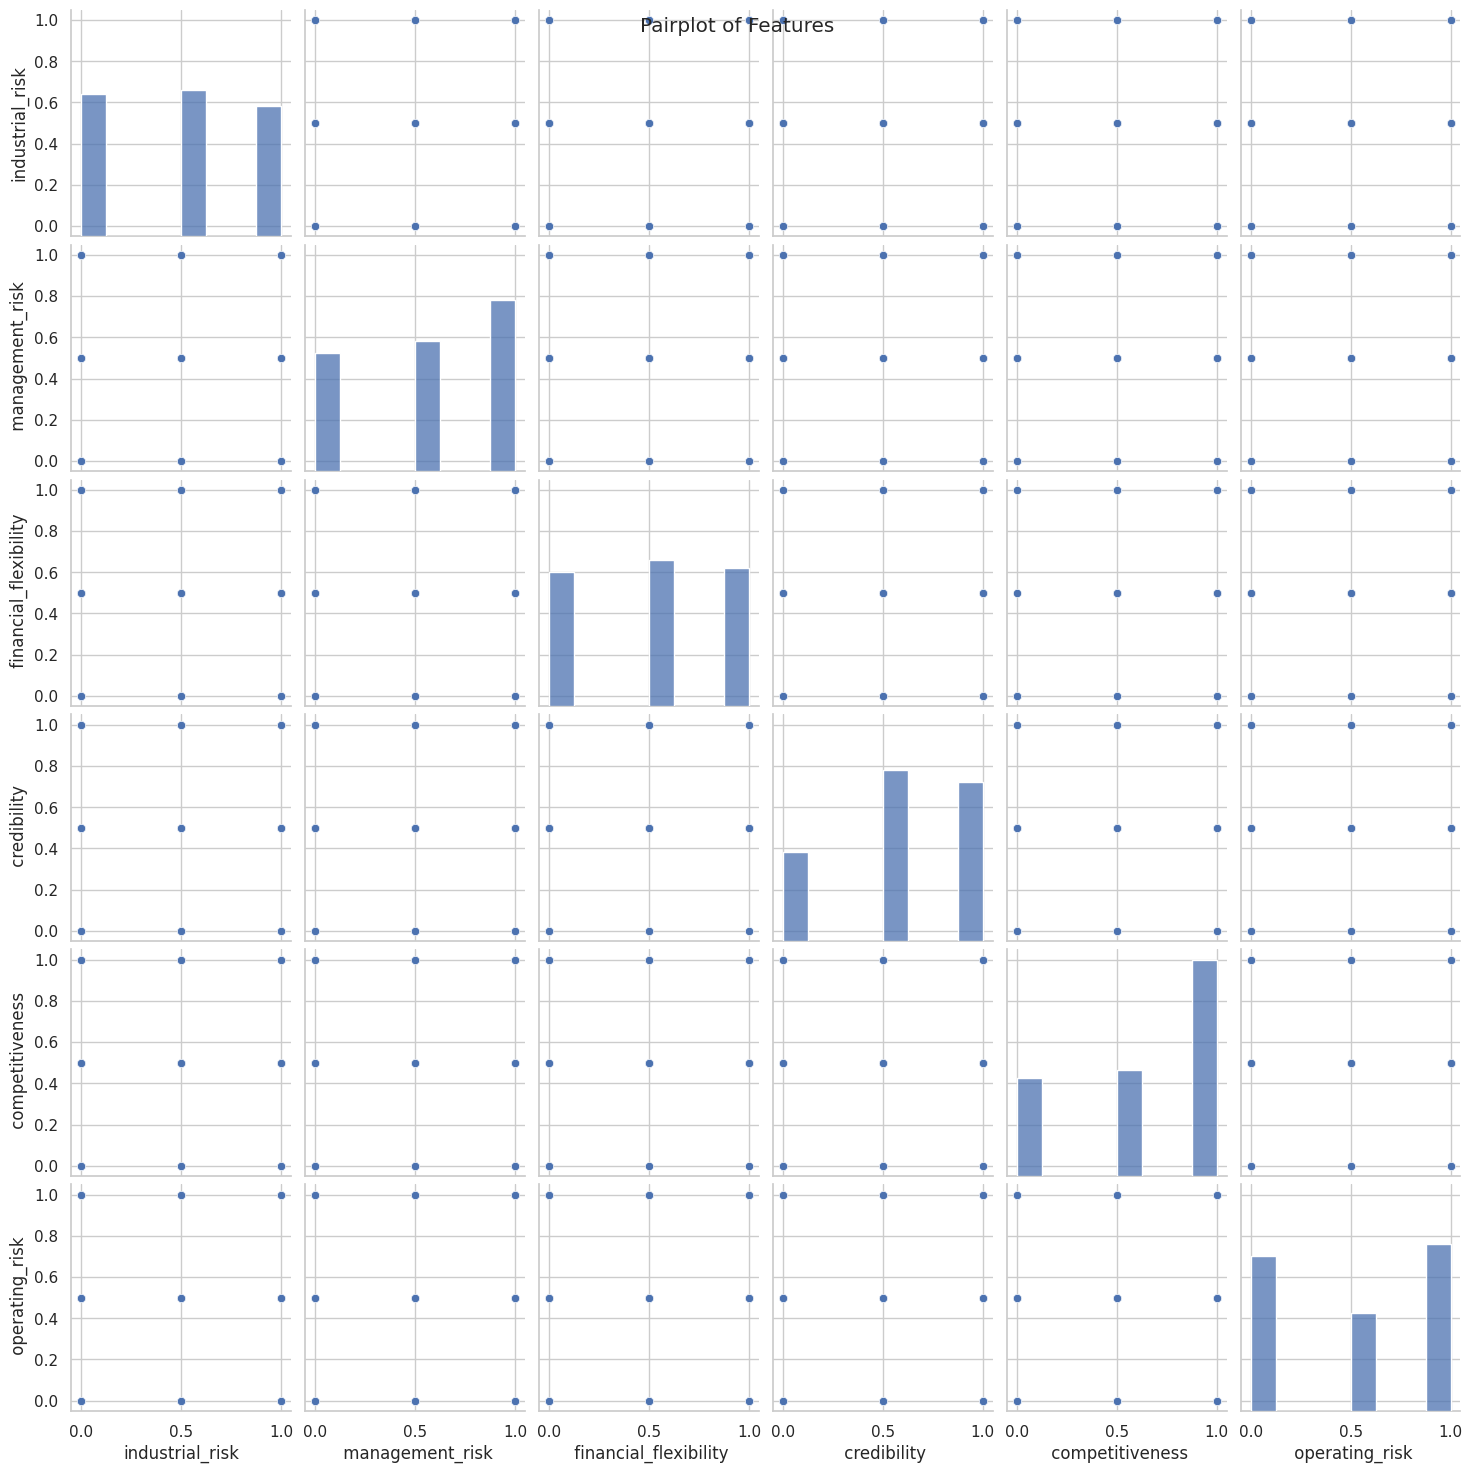

In [ ]:
# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Features')
plt.show()

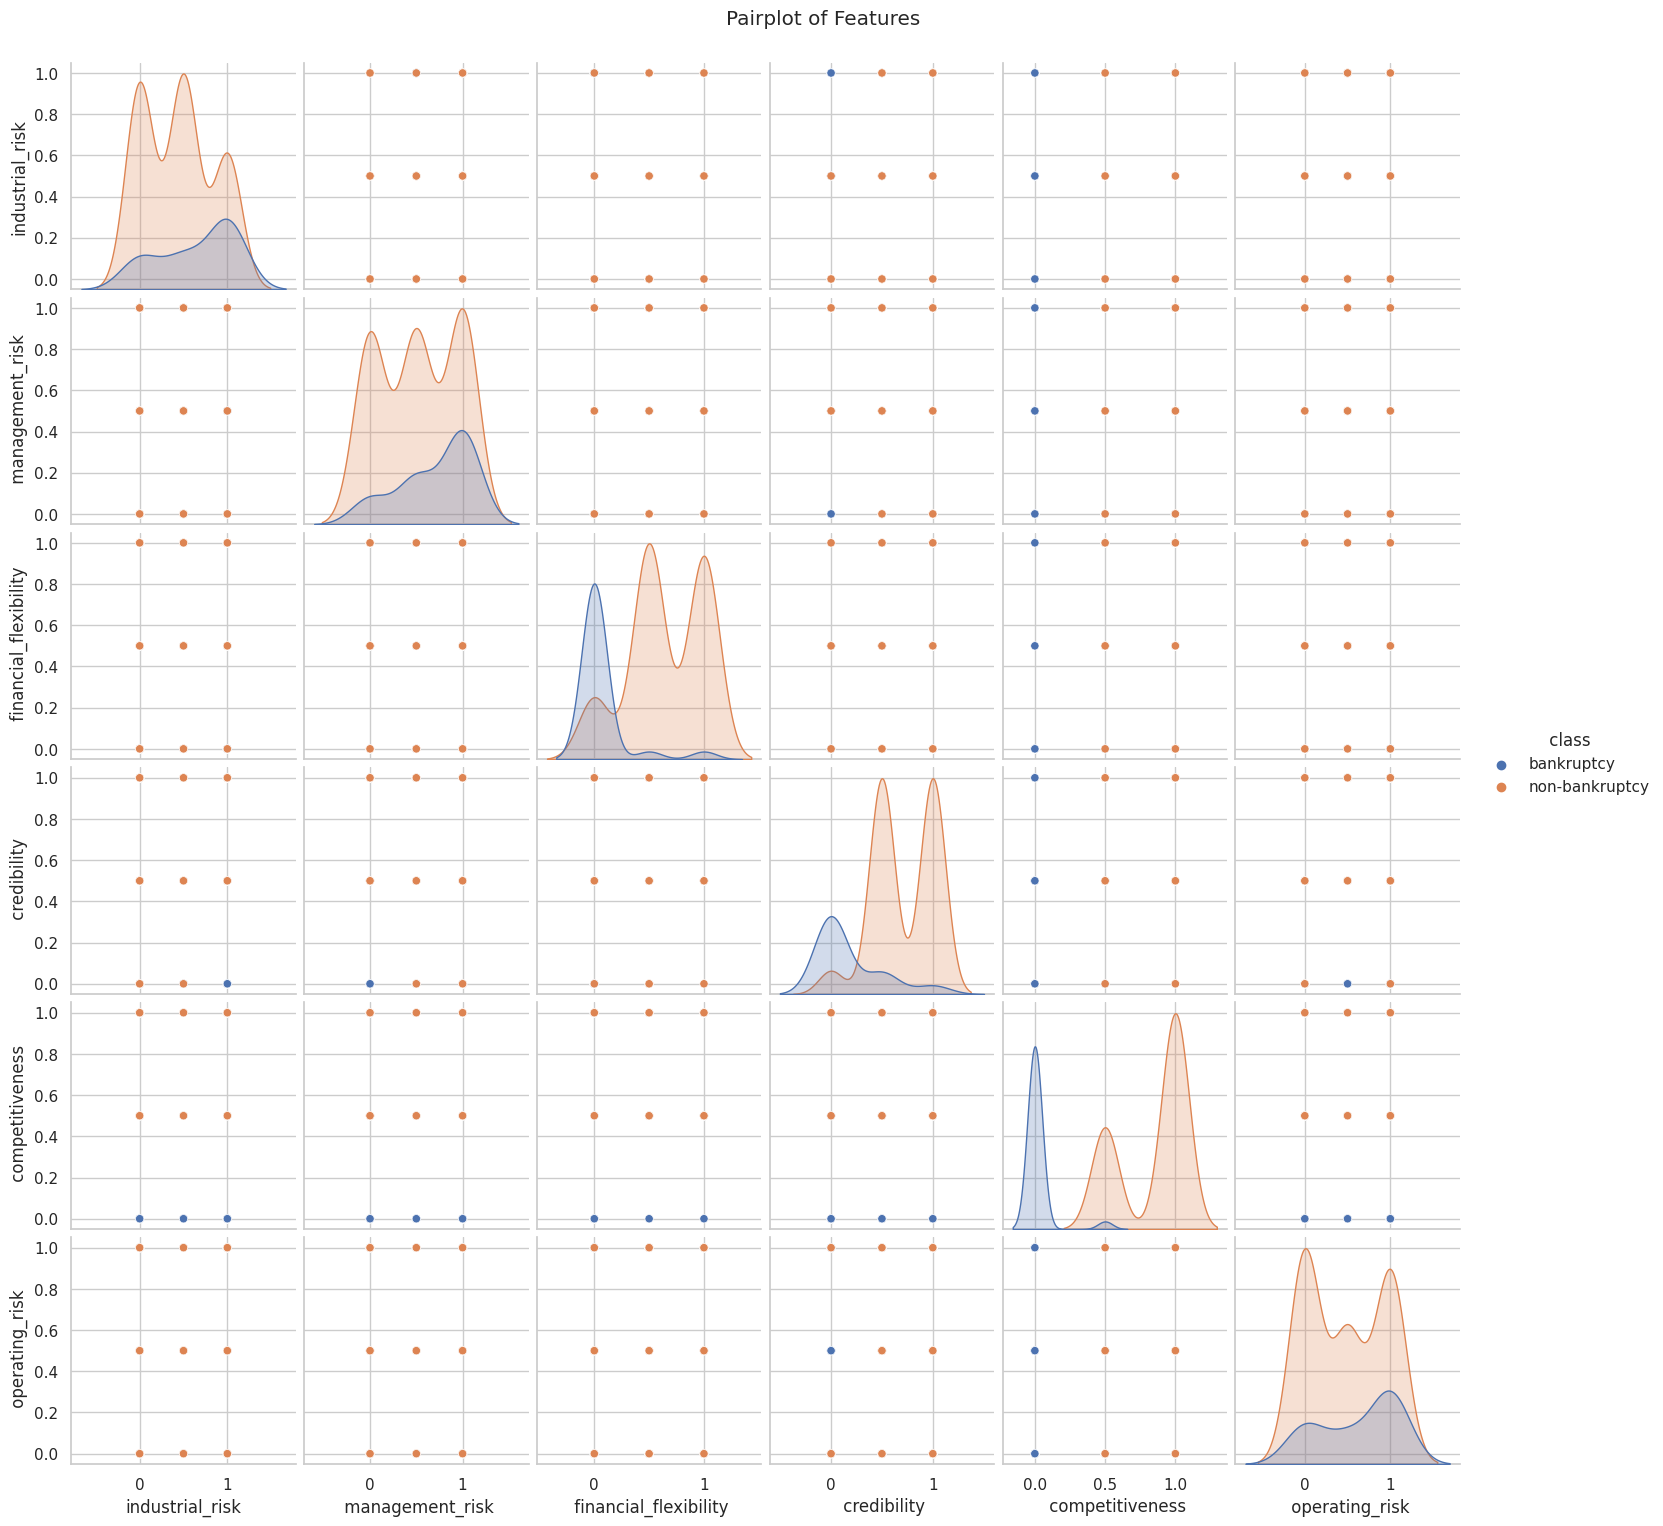

In [ ]:
# Pairplot
sns.pairplot(df, hue=' class', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

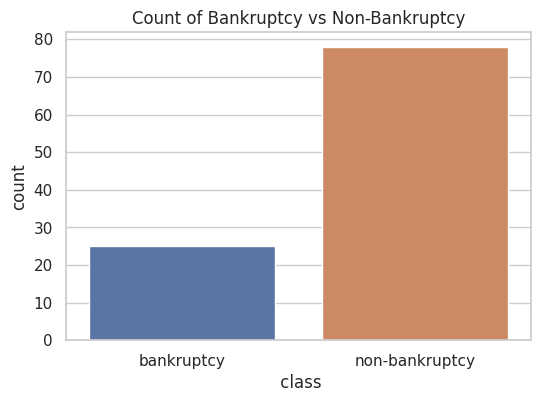

In [ ]:
# Countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=' class', data=df)
plt.title('Count of Bankruptcy vs Non-Bankruptcy')
plt.show()


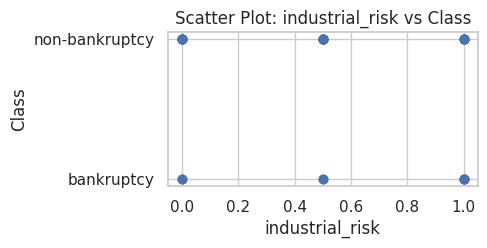

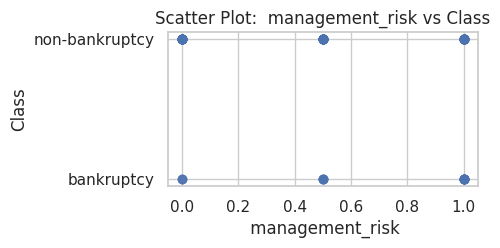

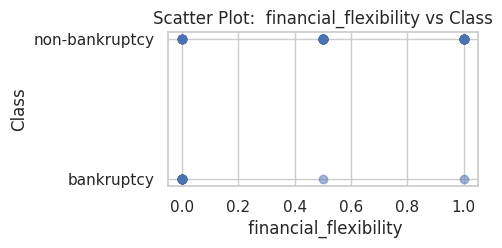

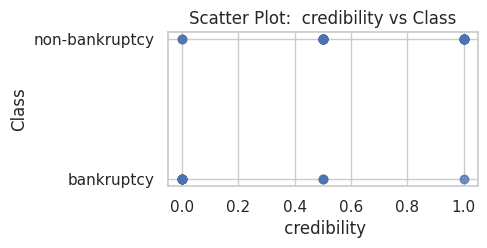

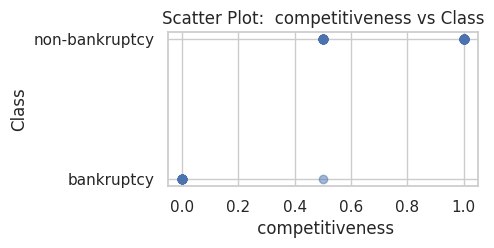

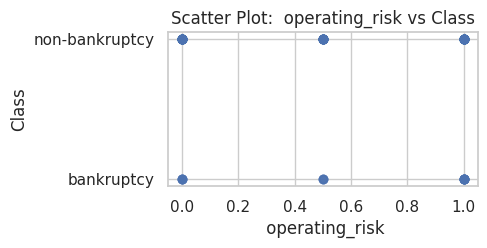

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Iterate through each feature and create a separate scatter plot for each one against the target variable
for column in df.columns[:-1]:
    plt.figure(figsize=(4, 2))
    plt.scatter(df[column], df[' class'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Class')
    plt.title(f'Scatter Plot: {column} vs Class')
    plt.show()

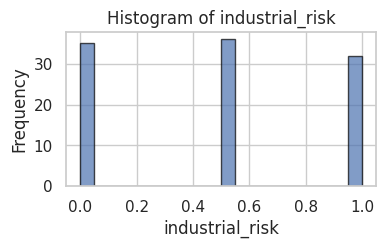

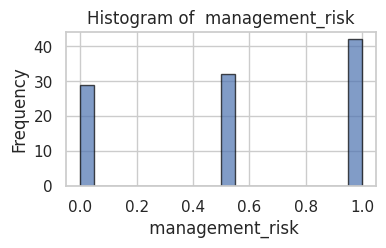

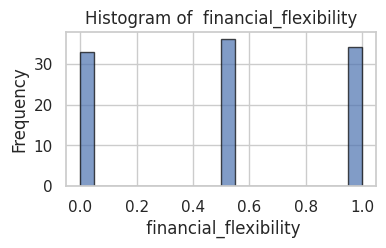

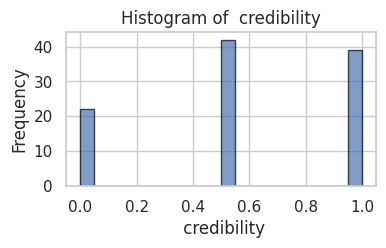

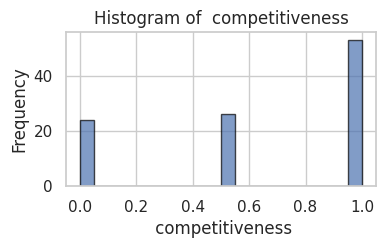

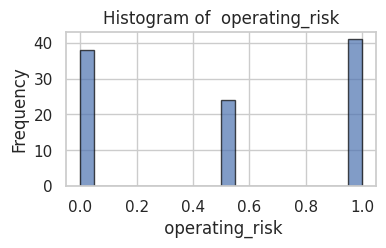

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Iterate through each feature and create a separate histogram
for column in df.columns[:-1]:
    plt.figure(figsize=(4, 2))
    plt.hist(df[column], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=85d642b2204e5316d5693e82e858e216303a79a01b2eb7a40e8a244aa5ae571b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

# Generate the EDA report
profile = ProfileReport(df)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.2 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
# Generate the EDA report
report = sv.analyze(df)
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#file:///C:/Users/prabi/Documents/sweetviz_report.html

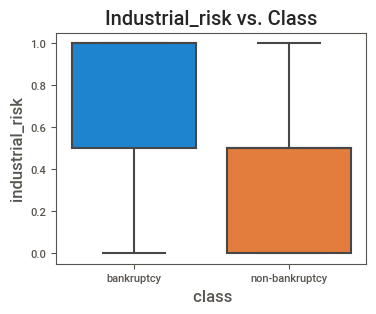

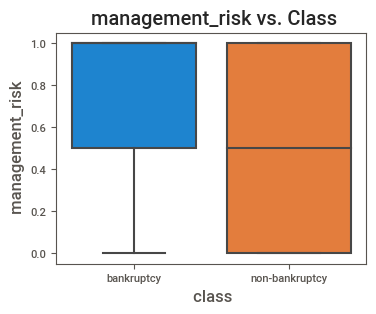

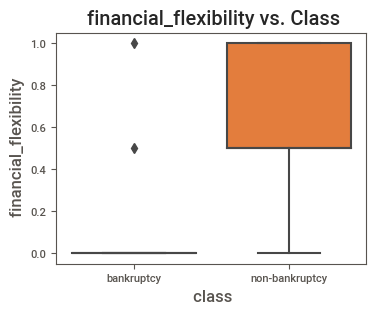

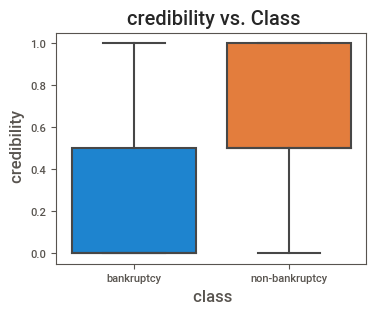

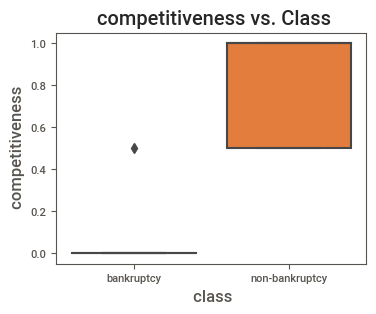

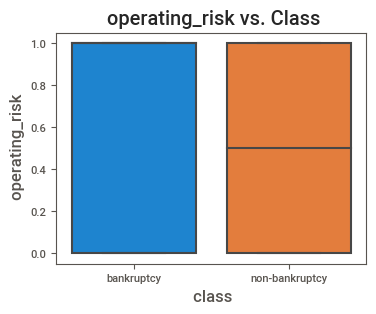

In [ ]:

# List of feature columns
feature_columns = ['industrial_risk',  ' management_risk',' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk']

# Create individual box plots for each feature
for column in feature_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=' class', y=column, data=df)
    plt.title(f'{column.capitalize()} vs. Class')
    plt.show()